### Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datawig
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


### Import des données 

In [2]:
#On remarque des "?" dans nos données qu'on considère comme des valeurs manquantes
missing_values = ["n/a", "na", "--", "?", " "]
fraud = pd.read_csv("insurance_claims.csv", na_values = missing_values)

### Premières observations 

In [3]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
fraud.dtypes 

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
fraud.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,657,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,1992-04-28,OH,250/500,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


In [6]:
def operation(x):
 return(x.mean(), x.min(), x.max())

fraud.select_dtypes(exclude=['object']).apply(operation,axis=0)

months_as_customer                             (203.954, 0.0, 479.0)
age                                             (38.948, 19.0, 64.0)
policy_number                       (546238.648, 100804.0, 999435.0)
policy_deductable                            (1136.0, 500.0, 2000.0)
policy_annual_premium          (1256.4061500000018, 433.33, 2047.59)
umbrella_limit                   (1101000.0, -1000000.0, 10000000.0)
insured_zip                         (501214.488, 430104.0, 620962.0)
capital-gains                               (25126.1, 0.0, 100500.0)
capital-loss                              (-26793.7, -111100.0, 0.0)
incident_hour_of_the_day                         (11.644, 0.0, 23.0)
number_of_vehicles_involved                        (1.839, 1.0, 4.0)
bodily_injuries                                    (0.992, 0.0, 2.0)
witnesses                                          (1.487, 0.0, 3.0)
total_claim_amount                       (52761.94, 100.0, 114920.0)
injury_claim                      

### Traitement des premières anomalies détectées 

In [7]:
#Supression de certaines colonnes inutiles ou avec trop de catégories 
del fraud['_c39']
del fraud['capital-gains']
del fraud['capital-loss']
del fraud['insured_zip']
del fraud['policy_number']
del fraud['incident_location']

In [8]:
#Variable umbrella limit doit être >= 0, 1 valeur = - 10000000 qu'on remplace par 0 
fraud=fraud.replace(-1000000, 0)

In [9]:
#Réorganisation de la base pour avoir notre y en première colonne 
cols = ['fraud_reported'] + [col for col in fraud if col!='fraud_reported']
fraud = fraud[cols]

### Traitement des valeurs manquantes

In [10]:
#Pourcentage de valeurs manquantes par variable
fraud.isnull().sum()/len(fraud)

2019-12-29 23:57:48,053 [INFO]  NumExpr defaulting to 4 threads.


fraud_reported                 0.000
months_as_customer             0.000
age                            0.000
policy_bind_date               0.000
policy_state                   0.000
policy_csl                     0.000
policy_deductable              0.000
policy_annual_premium          0.000
umbrella_limit                 0.000
insured_sex                    0.000
insured_education_level        0.000
insured_occupation             0.000
insured_hobbies                0.000
insured_relationship           0.000
incident_date                  0.000
incident_type                  0.000
collision_type                 0.178
incident_severity              0.000
authorities_contacted          0.000
incident_state                 0.000
incident_city                  0.000
incident_hour_of_the_day       0.000
number_of_vehicles_involved    0.000
property_damage                0.360
bodily_injuries                0.000
witnesses                      0.000
police_report_available        0.343
t

#### Variable collision_type

In [11]:
#On fait l'hypothèse que la variable incident_type peut nous aider à combler les valeurs manquantes 
collision = pd.concat([fraud['collision_type'], fraud['incident_type']], axis=1)

#On remplace les valeurs manquantes par des "M" et les autres valeurs (Side, Front, Rear Collision) par des "NM"
collision["collision_type"].fillna("M", inplace=True)
collision=collision.replace('Side Collision', 'NM')
collision=collision.replace('Front Collision', 'NM')
collision=collision.replace('Rear Collision', 'NM')

#On fait l'hypothèse que les valeurs parked car et vehicle theft de la variable incident_type n'impliqueront pas une collision
#A l'inverse les valeurs single et multi-vehicle collision impliqueront une collision 
collision=collision.replace('Parked Car', '1')
collision=collision.replace('Vehicle Theft', '1')
collision=collision.replace('Single Vehicle Collision', '2')
collision=collision.replace('Multi-vehicle Collision', '2')

#On labélise proprement les deux variables 
enc = LabelEncoder()
collision['collision_type'] = enc.fit_transform(collision['collision_type'])
collision['incident_type'] = enc.fit_transform(collision['incident_type'])

In [12]:
# On définit 2 types de corrélation 
def correlation_etendue(collision, model, **params):
 cor = collision.corr()
 collision = scale(collision)
 for i in range(cor.shape[0]):
     xi = collision[:, i:i+1]
     for j in range(cor.shape[1]):
         mod = model(**params)
         xj = collision[:, j]
         mod.fit(xi, xj)
         v = mod.predict(xi)
         c = np.std(v)
         cor.iloc[i,j] = c
 return cor

def correlation_cross_val(collision, model, draws=5, **params):
 cor = collision.corr()
 collision = scale(collision)
 for i in range(cor.shape[0]):
     xi = collision[:, i:i+1]
     for j in range(cor.shape[1]):
         xj = collision[:, j]
         mem = []
         for k in range(0, draws):
             xi_train, xi_test, xj_train, xj_test = train_test_split(xi, xj, test_size=0.5)
             mod = model(**params)
             mod.fit(xi_train, xj_train)
             v = mod.predict(xi_test)
             c = (1 - np.var(v - xj_test))
             mem.append(max(c, 0) **0.5)
         cor.iloc[i,j] = sum(mem) / len(mem)
 return cor

#On regarde les résultats des corrélations 
cor1 = correlation_etendue(collision, DecisionTreeRegressor)
cor2 = correlation_cross_val(collision, DecisionTreeRegressor)
print(cor1,cor2)

                collision_type  incident_type
collision_type             1.0            1.0
incident_type              1.0            1.0                 collision_type  incident_type
collision_type             1.0            1.0
incident_type              1.0            1.0


In [13]:
#La corrélation est parfaite = 1 on décide donc de créer une nouvelle catégorie pour les valeurs manquantes
fraud["collision_type"].fillna("No Collision", inplace=True)  

#### Variable police_report_available

In [14]:
#On regarde un 1er type de corrélation : entre 2 variables catégorielles
incident = fraud[pd.isnull(fraud['police_report_available']) == False] 
incident = incident.select_dtypes('object') 
incident.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,fraud_reported,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
fraud_reported,1.000000,0.054549,0.034781,0.032025,0.015753,0.014140,0.038762,-0.108142,-0.072045,-0.015794,0.171339,0.115880,0.428572,-0.144482,0.006223,0.062388,0.097803,-0.025046,-0.032898,-0.001626
policy_bind_date,0.054549,1.000000,0.064201,-0.004148,-0.011382,0.026624,0.045702,0.013173,-0.005082,0.105262,-0.053908,-0.056520,-0.012371,0.005737,0.036606,0.046956,0.025048,-0.029143,0.030459,0.047825
policy_state,0.034781,0.064201,1.000000,-0.016864,-0.013692,0.083245,0.017243,-0.026851,-0.023658,0.041236,0.004839,0.056325,0.014998,0.012669,0.039949,-0.106461,-0.063453,0.011579,0.026332,0.059755
policy_csl,0.032025,-0.004148,-0.016864,1.000000,0.071493,0.011281,0.055276,0.002059,-0.064373,-0.000171,-0.011366,-0.052985,-0.026228,-0.046152,-0.004578,-0.026237,0.009618,0.036666,0.009458,-0.018845
insured_sex,0.015753,-0.011382,-0.013692,0.071493,1.000000,0.022013,0.038762,0.068719,0.021533,0.037380,-0.047191,-0.031533,0.020680,-0.025441,-0.026469,0.017607,-0.028250,-0.009986,-0.063208,-0.052579
insured_education_level,0.014140,0.026624,0.083245,0.011281,0.022013,1.000000,0.082653,-0.017926,0.033741,0.034390,0.015503,0.020507,0.019425,0.000916,-0.049511,0.014227,-0.047317,-0.087188,0.051610,0.013951
insured_occupation,0.038762,0.045702,0.017243,0.055276,0.038762,0.082653,1.000000,-0.001052,-0.001406,0.073994,0.042062,0.048639,0.021690,-0.056113,0.053279,0.025835,0.062129,-0.009673,-0.002062,0.002782
insured_hobbies,-0.108142,0.013173,-0.026851,0.002059,0.068719,-0.017926,-0.001052,1.000000,-0.004832,-0.005976,-0.075953,-0.021695,-0.004290,0.014004,0.034013,-0.020063,-0.065157,-0.092352,0.028765,0.038724
insured_relationship,-0.072045,-0.005082,-0.023658,-0.064373,0.021533,0.033741,-0.001406,-0.004832,1.000000,-0.012907,-0.045517,-0.024428,-0.017769,0.043163,-0.026013,-0.008671,0.010427,0.003091,0.017600,0.045359
incident_date,-0.015794,0.105262,0.041236,-0.000171,0.037380,0.034390,0.073994,-0.005976,-0.012907,1.000000,0.013867,-0.008809,-0.040117,-0.023654,0.086657,0.009383,0.016006,-0.024969,0.037024,0.061144


In [15]:
#On regarde un 2ème type de corrélation : entre 1 variable catégorielle et 1 continue
incident = fraud[pd.isnull(fraud['police_report_available']) == False] 
incident = pd.concat([incident.select_dtypes(int), incident['police_report_available']], axis=1)
incident = pd.get_dummies(incident, drop_first=True)                  
incident.corr()

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,police_report_available_YES
months_as_customer,1.000000,0.937324,0.054628,-0.013437,0.059486,0.020275,-0.017352,0.067143,0.076141,0.084445,0.055083,0.070937,-0.027471,-0.068435
age,0.937324,1.000000,0.060019,-0.021797,0.076212,0.026870,-0.022421,0.056723,0.076488,0.087802,0.061996,0.068818,-0.032001,-0.060153
policy_deductable,0.054628,0.060019,1.000000,-0.028168,0.067424,0.068294,-0.024061,0.057471,0.042309,0.055270,0.076139,0.025761,0.067077,0.043761
umbrella_limit,-0.013437,-0.021797,-0.028168,1.000000,-0.029707,-0.015067,0.047969,0.015651,-0.074501,-0.043587,-0.061688,-0.077342,-0.032034,-0.028853
incident_hour_of_the_day,0.059486,0.076212,0.067424,-0.029707,1.000000,0.114628,-0.035258,-0.002959,0.202453,0.150181,0.137618,0.209724,0.005335,0.036956
number_of_vehicles_involved,0.020275,0.026870,0.068294,-0.015067,0.114628,1.000000,0.030850,0.001987,0.271336,0.217715,0.225455,0.266519,0.011332,0.001439
bodily_injuries,-0.017352,-0.022421,-0.024061,0.047969,-0.035258,0.030850,1.000000,-0.004240,0.080364,0.072088,0.097754,0.069157,-0.001537,0.009322
witnesses,0.067143,0.056723,0.057471,0.015651,-0.002959,0.001987,-0.004240,1.000000,-0.000020,-0.017963,0.086000,-0.017262,0.080648,0.046826
total_claim_amount,0.076141,0.076488,0.042309,-0.074501,0.202453,0.271336,0.080364,-0.000020,1.000000,0.809136,0.818031,0.983792,-0.060223,0.082078
injury_claim,0.084445,0.087802,0.055270,-0.043587,0.150181,0.217715,0.072088,-0.017963,0.809136,1.000000,0.573813,0.730714,-0.042146,0.076662


In [16]:
#On choisit la variable vehicle_claim pour combler les valeurs manquantes avec datawig et SimpleImputer
df_train = fraud[pd.isnull(fraud['police_report_available']) == False]
df_test = fraud[pd.isnull(fraud['police_report_available'])]
imputer = datawig.SimpleImputer(
   input_columns=['vehicle_claim'],
   output_column='police_report_available',
   output_path = 'imputer_model'
   )
imputer.fit(train_df=df_train)
imputed = imputer.predict(df_test)
fraud['police_report_available'].fillna(imputed['police_report_available_imputed'].iloc[0], inplace=True) 

2019-12-29 23:57:48,406 [INFO]  
========== start: fit model
2019-12-29 23:57:48,407 [WARNING]  Already bound, ignoring bind()
2019-12-29 23:57:48,429 [INFO]  Epoch[0] Batch [0-19]	Speed: 17109.27 samples/sec	cross-entropy=0.818007	police_report_available-accuracy=0.515625
2019-12-29 23:57:48,446 [INFO]  Epoch[0] Train-cross-entropy=0.703619
2019-12-29 23:57:48,447 [INFO]  Epoch[0] Train-police_report_available-accuracy=0.514706
2019-12-29 23:57:48,448 [INFO]  Epoch[0] Time cost=0.038
2019-12-29 23:57:48,453 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-12-29 23:57:48,458 [INFO]  Epoch[0] Validation-cross-entropy=0.625408
2019-12-29 23:57:48,459 [INFO]  Epoch[0] Validation-police_report_available-accuracy=0.612500
2019-12-29 23:57:48,482 [INFO]  Epoch[1] Batch [0-19]	Speed: 15405.14 samples/sec	cross-entropy=0.675412	police_report_available-accuracy=0.553125
2019-12-29 23:57:48,500 [INFO]  Epoch[1] Train-cross-entropy=0.669184
2019-12-29 23:57:48,500 [INFO]  Epoch[

2019-12-29 23:57:49,090 [INFO]  Epoch[13] Train-cross-entropy=0.653494
2019-12-29 23:57:49,091 [INFO]  Epoch[13] Train-police_report_available-accuracy=0.533088
2019-12-29 23:57:49,091 [INFO]  Epoch[13] Time cost=0.038
2019-12-29 23:57:49,095 [INFO]  Saved checkpoint to "imputer_model/model-0013.params"
2019-12-29 23:57:49,101 [INFO]  Epoch[13] Validation-cross-entropy=0.612513
2019-12-29 23:57:49,101 [INFO]  Epoch[13] Validation-police_report_available-accuracy=0.600000
2019-12-29 23:57:49,119 [INFO]  Epoch[14] Batch [0-19]	Speed: 20387.72 samples/sec	cross-entropy=0.651263	police_report_available-accuracy=0.559375
2019-12-29 23:57:49,133 [INFO]  Epoch[14] Train-cross-entropy=0.653236
2019-12-29 23:57:49,133 [INFO]  Epoch[14] Train-police_report_available-accuracy=0.536765
2019-12-29 23:57:49,134 [INFO]  Epoch[14] Time cost=0.032
2019-12-29 23:57:49,138 [INFO]  Saved checkpoint to "imputer_model/model-0014.params"
2019-12-29 23:57:49,143 [INFO]  No improvement detected for 5 epochs co

#### Variable property_damage

In [17]:
#On regarde un 1er type de corrélation : entre 2 variables catégorielles
incident = fraud[pd.isnull(fraud['property_damage']) == False] 
incident = incident.select_dtypes('object') 
incident.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,fraud_reported,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
fraud_reported,1.000000,0.021637,0.015865,0.039027,0.030356,-0.006535,-0.010015,-0.172524,-0.081898,-0.001791,0.156804,0.011947,0.397223,-0.092541,0.026416,0.047764,0.075329,-0.020711,0.000828,0.036635
policy_bind_date,0.021637,1.000000,0.017791,0.004959,0.025177,0.003066,0.043659,-0.017914,-0.053854,0.187306,-0.028474,-0.040681,-0.015404,-0.016954,0.026510,0.060943,-0.015173,-0.011913,0.049002,0.019342
policy_state,0.015865,0.017791,1.000000,0.019144,-0.018969,0.125103,0.037354,-0.000391,-0.024423,0.037490,0.035506,0.022481,0.036986,-0.018195,0.026468,-0.004044,-0.092054,-0.013562,0.036051,0.039816
policy_csl,0.039027,0.004959,0.019144,1.000000,0.078021,-0.044616,0.010168,-0.009565,0.000696,0.053800,-0.034192,0.028735,-0.017862,-0.003681,0.014356,0.004762,0.011558,0.046888,-0.004037,-0.050740
insured_sex,0.030356,0.025177,-0.018969,0.078021,1.000000,-0.036996,-0.014312,0.039621,0.010117,-0.009884,-0.008578,-0.025539,0.029162,-0.023080,-0.012969,0.032475,0.021905,0.019319,-0.005762,-0.004609
insured_education_level,-0.006535,0.003066,0.125103,-0.044616,-0.036996,1.000000,0.099149,-0.030907,-0.046160,0.034029,0.025479,-0.023511,-0.013584,0.004161,-0.058905,0.031550,-0.012006,-0.022699,0.061795,0.047828
insured_occupation,-0.010015,0.043659,0.037354,0.010168,-0.014312,0.099149,1.000000,-0.026565,-0.004626,0.020261,-0.010308,0.076303,-0.038426,0.033238,0.004944,-0.008100,0.016007,-0.053832,0.002338,0.035925
insured_hobbies,-0.172524,-0.017914,-0.000391,-0.009565,0.039621,-0.030907,-0.026565,1.000000,0.015439,-0.036335,-0.068778,0.059504,0.016283,0.044521,-0.005934,-0.013293,-0.024507,0.002388,0.026802,0.005380
insured_relationship,-0.081898,-0.053854,-0.024423,0.000696,0.010117,-0.046160,-0.004626,0.015439,1.000000,-0.006407,-0.033447,0.005347,-0.025028,-0.020237,-0.034404,0.060537,0.001238,-0.032197,0.001167,0.032094
incident_date,-0.001791,0.187306,0.037490,0.053800,-0.009884,0.034029,0.020261,-0.036335,-0.006407,1.000000,0.026109,0.028080,-0.013362,0.001061,0.055549,-0.000865,0.040448,-0.002996,0.076560,0.096163


In [18]:
#On regarde un 2ème type de corrélation : entre 1 variable catégorielle et 1 continue
incident = fraud[pd.isnull(fraud['property_damage']) == False] 
incident = pd.concat([incident.select_dtypes(int), incident['property_damage']], axis=1)
incident = pd.get_dummies(incident, drop_first=True)                  
incident.corr()

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,property_damage_YES
months_as_customer,1.000000,0.922989,-0.006685,-0.054520,0.045733,0.000393,-0.007659,0.011211,0.073494,0.076879,0.056438,0.068760,-0.019804,0.003185
age,0.922989,1.000000,-0.003713,-0.034105,0.081037,-0.006675,-0.031992,0.023544,0.069813,0.084752,0.055978,0.061684,-0.001354,-0.005436
policy_deductable,-0.006685,-0.003713,1.000000,0.003734,0.051961,0.070482,-0.046627,0.054223,0.048228,0.074827,0.095240,0.024037,0.003821,0.013121
umbrella_limit,-0.054520,-0.034105,0.003734,1.000000,-0.021812,0.002988,0.002953,-0.003366,-0.023843,-0.063729,0.033827,-0.025521,-0.031196,-0.093565
incident_hour_of_the_day,0.045733,0.081037,0.051961,-0.021812,1.000000,0.146705,-0.057298,-0.021466,0.234393,0.186050,0.197353,0.230172,-0.026953,0.052150
number_of_vehicles_involved,0.000393,-0.006675,0.070482,0.002988,0.146705,1.000000,0.066933,-0.000720,0.278112,0.231885,0.214513,0.275216,0.023026,-0.019592
bodily_injuries,-0.007659,-0.031992,-0.046627,0.002953,-0.057298,0.066933,1.000000,-0.038441,0.078046,0.058392,0.050722,0.081367,-0.008536,0.010647
witnesses,0.011211,0.023544,0.054223,-0.003366,-0.021466,-0.000720,-0.038441,1.000000,-0.012228,-0.039708,0.065316,-0.023454,0.052526,-0.006203
total_claim_amount,0.073494,0.069813,0.048228,-0.023843,0.234393,0.278112,0.078046,-0.012228,1.000000,0.817778,0.809631,0.983993,-0.012172,0.072819
injury_claim,0.076879,0.084752,0.074827,-0.063729,0.186050,0.231885,0.058392,-0.039708,0.817778,1.000000,0.566157,0.743427,0.008297,0.049918


In [19]:
#On choisit la variable umbrella_limit pour combler les valeurs manquantes avec datawig et SimpleImputer
umbrella = pd.get_dummies(fraud['umbrella_limit'], prefix='umbrella')
imputation = pd.concat([fraud, umbrella], axis=1)
df_train = imputation[pd.isnull(fraud['property_damage']) == False]
df_test = imputation[pd.isnull(fraud['property_damage'])]
imputer = datawig.SimpleImputer(
   input_columns=['umbrella_0'],
   output_column='property_damage',
   output_path = 'imputer_model'
   )
imputer.fit(train_df=df_train)
imputed = imputer.predict(df_test)
fraud['property_damage'].fillna(imputed['property_damage_imputed'].iloc[0], inplace=True)

2019-12-29 23:57:49,525 [INFO]  
========== start: fit model
2019-12-29 23:57:49,526 [WARNING]  Already bound, ignoring bind()
2019-12-29 23:57:49,545 [INFO]  Epoch[0] Batch [0-18]	Speed: 19188.58 samples/sec	cross-entropy=0.846745	property_damage-accuracy=0.473684
2019-12-29 23:57:49,562 [INFO]  Epoch[0] Train-cross-entropy=0.671756
2019-12-29 23:57:49,563 [INFO]  Epoch[0] Train-property_damage-accuracy=0.544118
2019-12-29 23:57:49,564 [INFO]  Epoch[0] Time cost=0.036
2019-12-29 23:57:49,568 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-12-29 23:57:49,572 [INFO]  Epoch[0] Validation-cross-entropy=0.651745
2019-12-29 23:57:49,573 [INFO]  Epoch[0] Validation-property_damage-accuracy=0.546875
2019-12-29 23:57:49,595 [INFO]  Epoch[1] Batch [0-18]	Speed: 15338.00 samples/sec	cross-entropy=0.689438	property_damage-accuracy=0.493421
2019-12-29 23:57:49,611 [INFO]  Epoch[1] Train-cross-entropy=0.657688
2019-12-29 23:57:49,612 [INFO]  Epoch[1] Train-property_damage-accurac

### Transformation des dates

In [20]:
#On conserve uniquement l'année pour la variable policy_bind_date
fraud['policy_bind_date'] = pd.DatetimeIndex(fraud['policy_bind_date']).year

#On conserve uniquement le mois pour la variable incident_date
fraud['incident_date'] = pd.to_datetime(fraud['incident_date']).dt.to_period('M')
fraud['incident_date']=fraud['incident_date'].astype(str)

#On transforme la variable months_as_customer en years_as_customer
fraud['months_as_customer'] = (fraud['months_as_customer']/12).astype(int)
fraud.rename(columns={'months_as_customer':'years_as_customer'}, inplace=True)

#On transforme la variable auto_year qui donnait l'année, en nombre d'années (ex : 2014 devient 1 an car les accident ont tous lieu en 2015)
fraud['auto_year']= abs(fraud['auto_year']-2015)

### Suppression d'autres variables

In [21]:
#On supprime les variables trop corrélées entre elles 
del fraud['years_as_customer'] #correlée avec age
del fraud['property_claim'] #corelatée avec total_claim_amount
del fraud['vehicle_claim'] #corelatée avec total_claim_amount
del fraud['injury_claim'] #corelatée avec total_claim_amount

### Réduction des catégories pour certaines variables pour améliorer le modèle 

In [22]:
#La variable umbrella_limit prend la valeur 0 si umbrella_limit = 0 ou 1 umbrella_limit > 0
fraud['umbrella_limit'] = np.where(fraud['umbrella_limit']>0, '1', fraud['umbrella_limit'])
fraud['umbrella_limit']=fraud['umbrella_limit'].astype(str)

#On réduit le nombre de catégorie pour la variable insured_education_level
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'MD', 'Doctoral Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'PhD', 'Doctoral Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'JD', 'Doctoral Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'MD', 'Associate/Bachelor/Master Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'College', 'Associate/Bachelor/Master Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'Associate', 'Associate/Bachelor/Master Degree', fraud['insured_education_level'])
fraud['insured_education_level'] = np.where(fraud['insured_education_level']== 'Masters', 'Associate/Bachelor/Master Degree', fraud['insured_education_level'])

### Préparation des données

In [23]:
fraud = pd.get_dummies(fraud, drop_first = True)

#Définition des variables X et y 
X = fraud.loc[:, fraud.columns != 'fraud_reported_Y']
y = fraud.loc[:, 'fraud_reported_Y']

#On a remarqué que notre dataset était unbalanced, SMOTE permet d'obtenir unn dataset balanced
os = SMOTE(random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y)
print("length of oversampled data is ",len(os_data_X)) # we can Check the numbers of our data (1200)
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['fraud_reported_Y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['fraud_reported_Y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['fraud_reported_Y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['fraud_reported_Y']==1])/len(os_data_X))

length of oversampled data is  1506
Number of no subscription in oversampled data 753
Number of subscription 753
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### Recursive Feature Elimination (RFE) pour conserver les variables les plus importantes

In [24]:
#On sélectionne les 10 variables les plus importantes 
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
features_bool = np.array(rfe.support_)
features= np.array(os_data_X.columns)
result = features[features_bool]
print(result)
print(rfe.support_)
print(rfe.ranking_)

['insured_hobbies_chess' 'insured_hobbies_cross-fit'
 'incident_severity_Minor Damage' 'incident_severity_Total Loss'
 'incident_severity_Trivial Damage' 'auto_make_Jeep' 'auto_make_Nissan'
 'auto_make_Saab' 'auto_make_Suburu' 'auto_make_Toyota']
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False Fals

In [25]:
#On regarde une première régression logistique avec nos 10 variables 
cols=['insured_occupation_handlers-cleaners','insured_occupation_machine-op-inspct', 'insured_occupation_other-service','insured_hobbies_chess', 'insured_hobbies_cross-fit','incident_severity_Minor Damage', 'incident_severity_Total Loss','incident_severity_Trivial Damage',
 'auto_make_Nissan','auto_model_Wrangler']

X=os_data_X[cols]
y=os_data_y['fraud_reported_Y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                   Results: Logit
Model:                      Logit                    Pseudo R-squared:         inf   
Dependent Variable:         fraud_reported_Y         AIC:                      inf   
Date:                       2019-12-29 23:57         BIC:                      inf   
No. Observations:           1506                     Log-Likelihood:           -inf  
Df Model:                   9                        LL-Null:                  0.0000
Df Residuals:               1496                     LLR p-value:              1.0000
Converged:                  1.0000                   Scale:                    1.0000
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.025  

In [26]:
#On remarque que 5 variables ont des p-values supérieures à 0.05, on décide donc de les supprimer 
cols=['insured_hobbies_chess','insured_hobbies_cross-fit', 'incident_severity_Minor Damage','incident_severity_Total Loss', 'incident_severity_Trivial Damage'] 

X=os_data_X[cols]
y=os_data_y['fraud_reported_Y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 246.706442
         Iterations 6
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      inf        
Dependent Variable:      fraud_reported_Y      AIC:                   743089.8039
Date:                    2019-12-29 23:57      BIC:                   743116.3900
No. Observations:        1506                  Log-Likelihood:        -3.7154e+05
Df Model:                4                     LL-Null:               0.0000     
Df Residuals:            1501                  LLR p-value:           1.0000     
Converged:               1.0000                Scale:                 1.0000     
No. Iterations:          6.0000                                                  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------

In [27]:
#Effets marginaux 
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print('Parameters: ', logit_res.params)
margeff = logit_res.get_margeff()
print(margeff.summary())
print(logit_res.summary())

Parameters:  insured_hobbies_chess               3.835468
insured_hobbies_cross-fit           3.137327
incident_severity_Minor Damage     -2.224233
incident_severity_Total Loss       -2.328029
incident_severity_Trivial Damage   -2.434077
dtype: float64
        Logit Marginal Effects       
Dep. Variable:       fraud_reported_Y
Method:                          dydx
At:                           overall
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
insured_hobbies_chess                0.6290      0.060     10.529      0.000       0.512       0.746
insured_hobbies_cross-fit            0.5145      0.063      8.185      0.000       0.391       0.638
incident_severity_Minor Damage      -0.3648      0.023    -15.953      0.000      -0.410      -0.320
incident_severity_Total Loss        -0.3818      0.028    -13.406      0.000      -0.438  

In [28]:
#Odd ratios
params2 = logit_res.params
conf2 = logit_res.conf_int()
conf2["OR"] = params2
conf2.columns = ["Lower CI", "Upper CI", "OR"]
print("odds ratio with confidence intervals")
print(np.exp(conf2))

odds ratio with confidence intervals
                                   Lower CI    Upper CI         OR
insured_hobbies_chess             20.809907  103.080235  46.315118
insured_hobbies_cross-fit         10.276422   51.666089  23.042190
incident_severity_Minor Damage     0.076871    0.152158   0.108150
incident_severity_Total Loss       0.065336    0.145462   0.097488
incident_severity_Trivial Damage   0.042887    0.179252   0.087679


### Normalisation des données et Split train/test

In [29]:
##Normalization X 
sc_x = StandardScaler()
X_normalized=sc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

### Régression logistique

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



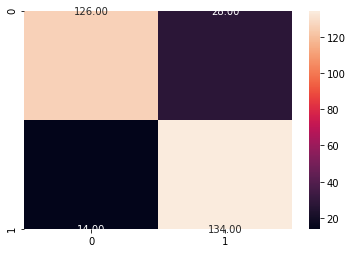

In [30]:
#Entrainement et prédiction 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Matrice de confusion 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### Decision Tree

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



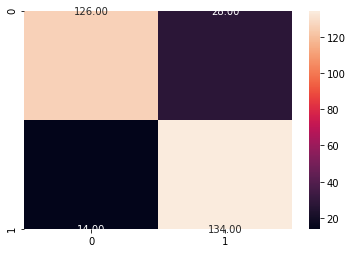

In [31]:
#Entrainement et prédiction 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### Arbres aléatoires

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



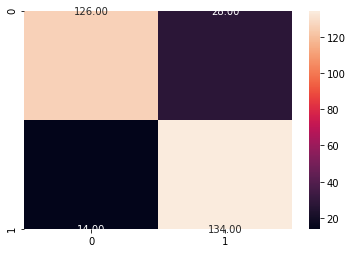

In [32]:
#Entrainement et prédiction 
classifier_300 = RandomForestClassifier(n_estimators = 300, max_depth=20)
classifier_300.fit(X_train, y_train)
y_pred = classifier_300.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(classifier_300.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(classifier_300.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### KNN 

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



([<matplotlib.axis.XTick at 0x1c3d1d4fd0>,
 <a list of 5 Text xticklabel objects>)

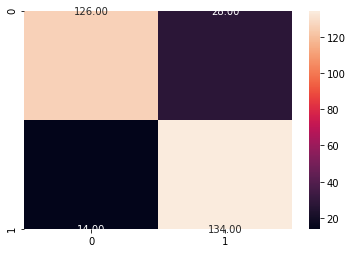

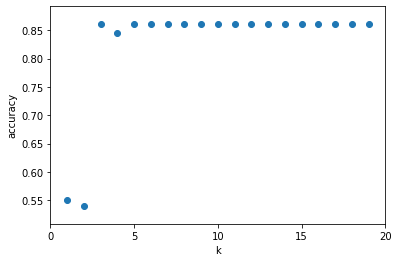

In [33]:
#Entrainement et prédiction 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

#Trouver le nombre de voisin optimal
k_range = range(1, 20)
scores = []
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors = k)
   knn.fit(X_train, y_train)
   scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### LDA

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



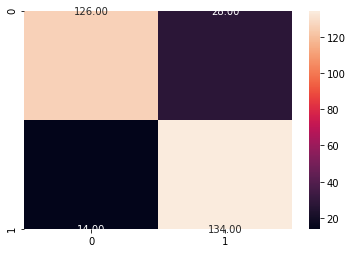

In [34]:
#Entrainement et prédiction 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### Naive Bayes

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



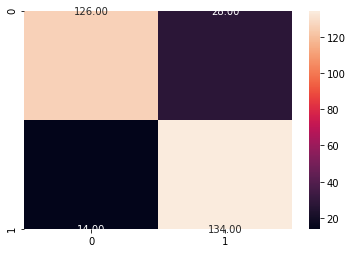

In [35]:
#Entrainement et prédiction 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### SVM

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.86
[[126  28]
 [ 14 134]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.83      0.91      0.86       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



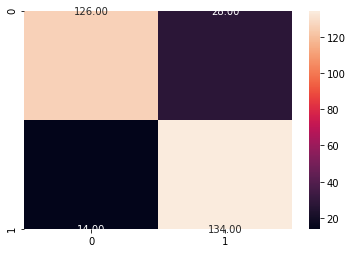

In [36]:
#Entrainement et prédiction 
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

#Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(sns.heatmap(confusion_matrix,annot=True,fmt=".2f"))
print(classification_report(y_test, y_pred))

### ROC curves

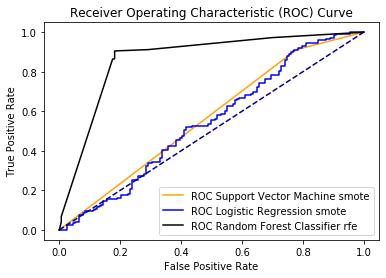

In [37]:
def plot_roc_curve(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3):
 plt.plot(fpr1, tpr1, color='orange', label='ROC Support Vector Machine smote')
 plt.plot(fpr2, tpr2, color='blue', label='ROC Logistic Regression smote')
 plt.plot(fpr3, tpr3, color='black', label='ROC Random Forest Classifier rfe')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()
    
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_svm)

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict_proba(X_test)
y_pred_log = y_pred_log[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_log)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
classifier =  RandomForestClassifier(n_estimators = 300, max_depth=20)
classifier.fit(X_train, y_train)
y_pred_log = classifier.predict_proba(X_test)
y_pred_log = y_pred_log[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_log)

plot_roc_curve(fpr1,tpr1,fpr2,tpr2,fpr3,tpr3)